<a href="https://www.kaggle.com/code/mounirelhady/dv-car-price-prediction?scriptVersionId=155310195" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv


# Import libraries 
***add libraries that we will use in our project***

In [2]:
# Adding the libraries
import numpy as np 
import openpyxl
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import os


#  Import dataset 
***Import the CSV file (dataset) that we will work on it***

In [3]:
# importing the dataset 
car_df = pd.read_csv('/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv')
car_df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


# Arranging and grouping 
***Arranging the data so that it is easy to visualize
 Grouping data to help in data arrangement and 
 also proper visualization***

In [4]:
car_df.dropna(inplace=True)  # Handling missing values if it exists

car_sorted_by_price = car_df.sort_values(by="Price", ascending=True)
car_sorted_by_price = car_sorted_by_price.set_index("Category")


car_sorted_by_price_desc = car_df.sort_values(by="Price", ascending=False)
car_sorted_by_price_desc = car_sorted_by_price_desc.set_index("Category")

import datetime
dtime=datetime.datetime.now()
car_df['Age']=dtime.year-car_df['Prod. year']

car_sorted_by_age = car_df.sort_values(by="Age", ascending=True)
car_sorted_by_age = car_sorted_by_age.set_index("Manufacturer")


car_sorted_by_age_desc = car_df.sort_values(by="Age", ascending=False)
car_sorted_by_age_desc = car_sorted_by_age_desc.set_index("Manufacturer")


# in this step i will group the data by Category and manufacturer column

car_groub_by_category = car_df.groupby('Category')
car_groub_by_manufacturer = car_df.groupby('Manufacturer')


# Pie Charts 

***This pie chart delineates the proportion of cars equipped with leather interiors juxtaposed against those lacking this feature. The presence of leather upholstery is often indicative of higher-end vehicles, thereby providing insights into the prevalence of luxury amenities within the automotive market. This visual representation serves to elucidate the distribution of a key quality indicator, influencing perceptions of car interior standards.***

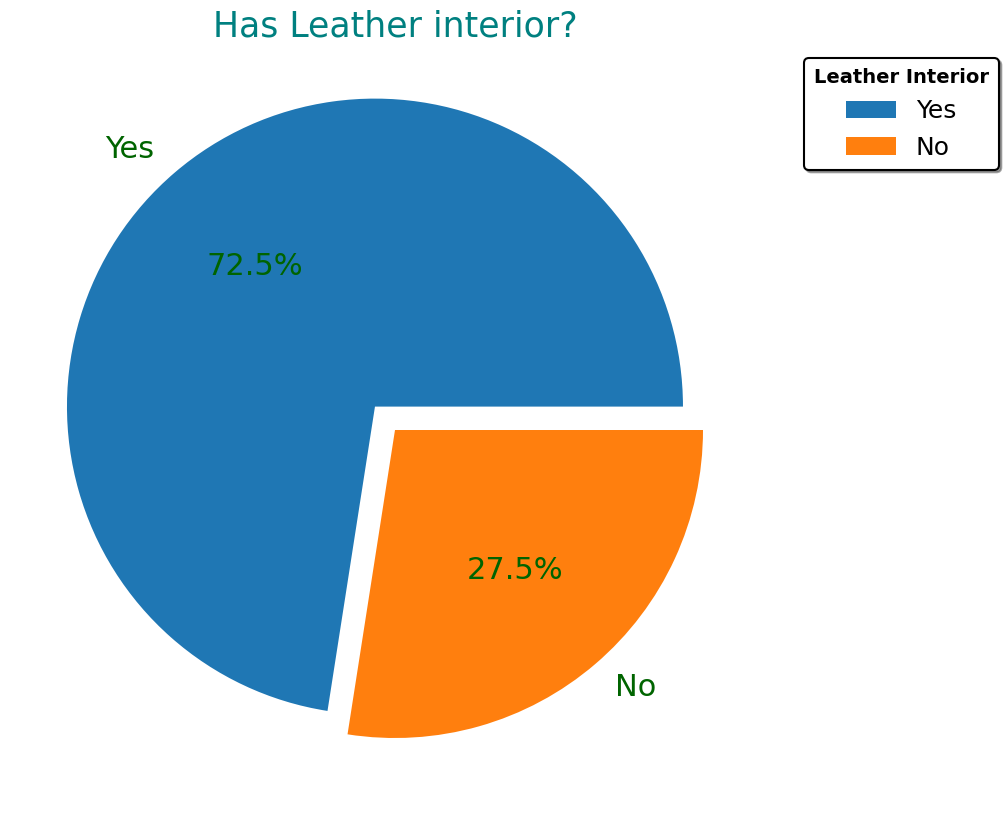

In [5]:
car_Leather = car_df['Leather interior'].value_counts()

explode = (0.1, 0)  

plt.figure(figsize=(15, 10))
plt.pie(car_Leather, explode=explode, labels=car_Leather.index,autopct='%1.1f%%',textprops={'fontsize': 22, 'color': 'darkgreen'})

plt.title("Has Leather interior?",color='teal',fontsize='25')

legend =plt.legend(car_Leather.index, title="Cars Leather Interior", loc="upper right", fontsize='18', shadow=True, bbox_to_anchor=(1.3, 1),edgecolor='black')

legend.set_title("Leather Interior", prop={'size': 14, 'weight': 'bold'})
legend.get_frame().set_linewidth(1.5)
legend.get_frame().set_edgecolor('black')

plt.show()


***This diagram illustrates the prevalence of right-hand and left-hand driving seat configurations in cars across different countries, reflecting variations in traffic regulations. For instance, countries like Egypt typically feature left-hand driving seats, while others, including some in the top portion of America, adhere to a right-hand driving configuration. The visual representation serves to underscore the diverse global standards in vehicular ergonomics and road traffic conventions.***

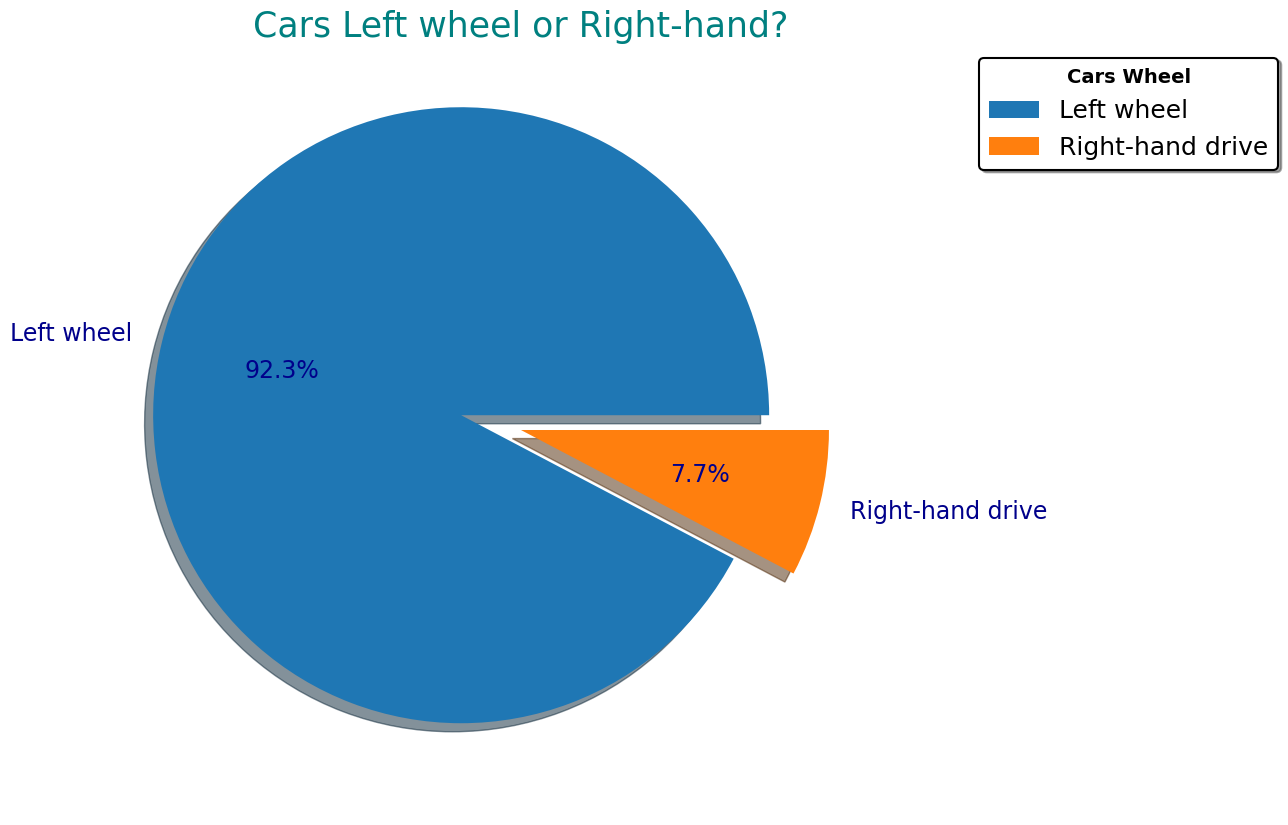

In [6]:
car_Wheel = car_df['Wheel'].value_counts()

explode = (0.2, 0)  

plt.figure(figsize=(15, 10))
plt.pie(car_Wheel, explode=explode, labels=car_Wheel.index,autopct='%1.1f%%',textprops={'fontsize': 17, 'color': 'darkblue'},shadow=True)

plt.title("Cars Left wheel or Right-hand?",color='teal',fontsize='25')
plt.yticks(fontsize='30')
legend =plt.legend(car_Wheel.index, title="Cars Wheel", loc="upper right", fontsize='18', shadow=True, bbox_to_anchor=(1.5, 1),edgecolor='black')

legend.set_title("Cars Wheel", prop={'size': 14, 'weight': 'bold'})
legend.get_frame().set_linewidth(1.5)
legend.get_frame().set_edgecolor('black')

plt.show()

***The pie plot visualizes the distribution of car types based on their 'Gear box type.' This visualization is essential as it provides a clear representation of the proportion of cars with different transmission systems (Automatic, Manual, Tiptronic, Variator ).It allows quick insights into the prevalence of each gear type, aiding in understanding market preferences and informing automotive-related decisions.***

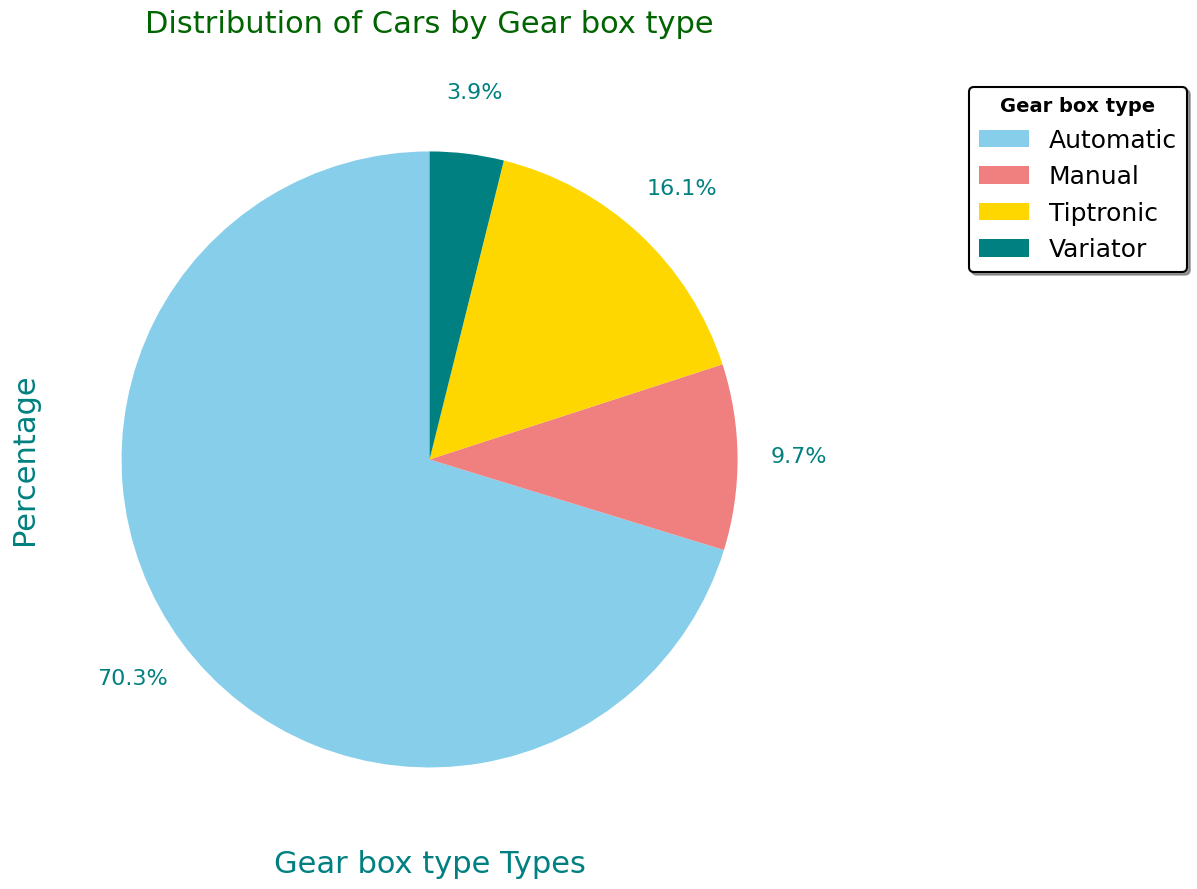

In [7]:

column_name = 'Gear box type'

if column_name in car_df.columns:
    Gearboxtype = car_df[column_name].value_counts()

    Gearboxtype = Gearboxtype.sort_index()

    explode = (0.1, 0.1) + (0,) * (len(Gearboxtype) - 2)

    custom_colors = ['skyblue', 'lightcoral', 'gold', 'teal']

    plot = Gearboxtype.plot.pie(
        y=column_name,
        figsize=(15, 10),
        autopct='%1.1f%%',
        labels=None,
        pctdistance=1.2,
        colors=custom_colors,
        #explode=explode,
        startangle=90,
        textprops={'fontsize': 16, 'color': 'teal'}
    )

    plt.xlabel(f'{column_name} Types', fontsize=22, color='teal')
    plt.ylabel('Percentage', fontsize=22, color='teal')

    legend = plt.legend(Gearboxtype.index, title=column_name, loc="upper right", fontsize='18',
                        shadow=True, bbox_to_anchor=(1.5, 1), edgecolor='black')

    legend.set_title(column_name, prop={'size': 14, 'weight': 'bold'})
    legend.get_frame().set_linewidth(1.5)
    legend.get_frame().set_edgecolor('black')

    plt.title(f"Distribution of Cars by {column_name}", fontsize=22, pad=30, color='darkgreen')

    plt.show()
else:
    print(f"Column '{column_name}' not found in the DataFrame.")


***In this pie chart, the distribution of cars by fuel type is depicted, illustrating the proportion of each fuel type among the dataset. This visualization is crucial for understanding the diversity of fuel options in the automotive industry, providing insights into the popularity of different fuel types and their environmental impact. By showcasing the prevalence of each fuel category, stakeholders can make informed decisions about sustainable energy solutions and regulatory initiatives.***

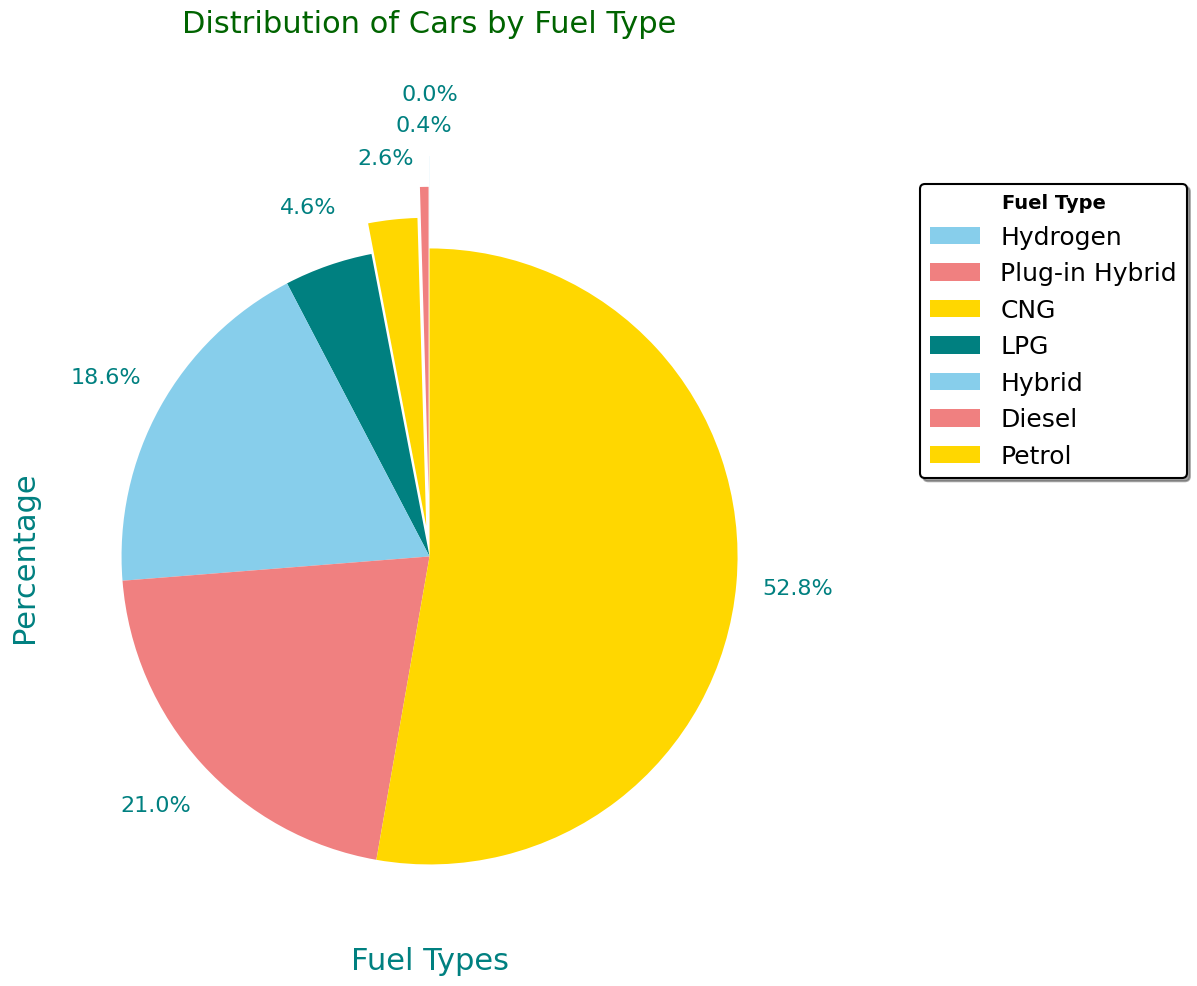

In [8]:

fuel = car_df['Fuel type'].value_counts()
fuel = fuel.sort_values()

explode = (0.3, 0.2, 0.1) + (0,) * (len(fuel) - 3)

custom_colors = ['skyblue', 'lightcoral', 'gold', 'teal']

plot = fuel.plot.pie(
    y='Fuel type',
    figsize=(15, 10),
    autopct='%1.1f%%',
    labels=None,
    pctdistance=1.2,
    colors=custom_colors,
    explode=explode,
    startangle=90,
    textprops={'fontsize': 16, 'color': 'teal'}
)

plt.xlabel('Fuel Types', fontsize=22, color='teal')
plt.ylabel('Percentage', fontsize=22, color='teal')
legend = plt.legend(fuel.index, title="Fuel Type", loc="upper right", fontsize='18', shadow=True, bbox_to_anchor=(1.5, 1), edgecolor='black')
legend.set_title("Fuel Type", prop={'size': 14, 'weight': 'bold'})
legend.get_frame().set_linewidth(1.5)
legend.get_frame().set_edgecolor('black')

plt.title("Distribution of Cars by Fuel Type", fontsize=22, pad=100, color='darkgreen')

plt.show()


***In this pie chart illustrating drive wheel distribution (front, rear, 4 by 4 ), we gain insights into the diversity of car configurations. This visualization is crucial for understanding the prevalence of different drive systems in the dataset, providing valuable information for car enthusiasts, manufacturers, and analysts interested in market trends and consumer preferences. The clear representation allows for a quick and intuitive grasp of the distribution, aiding decision-making in the automotive industry.***

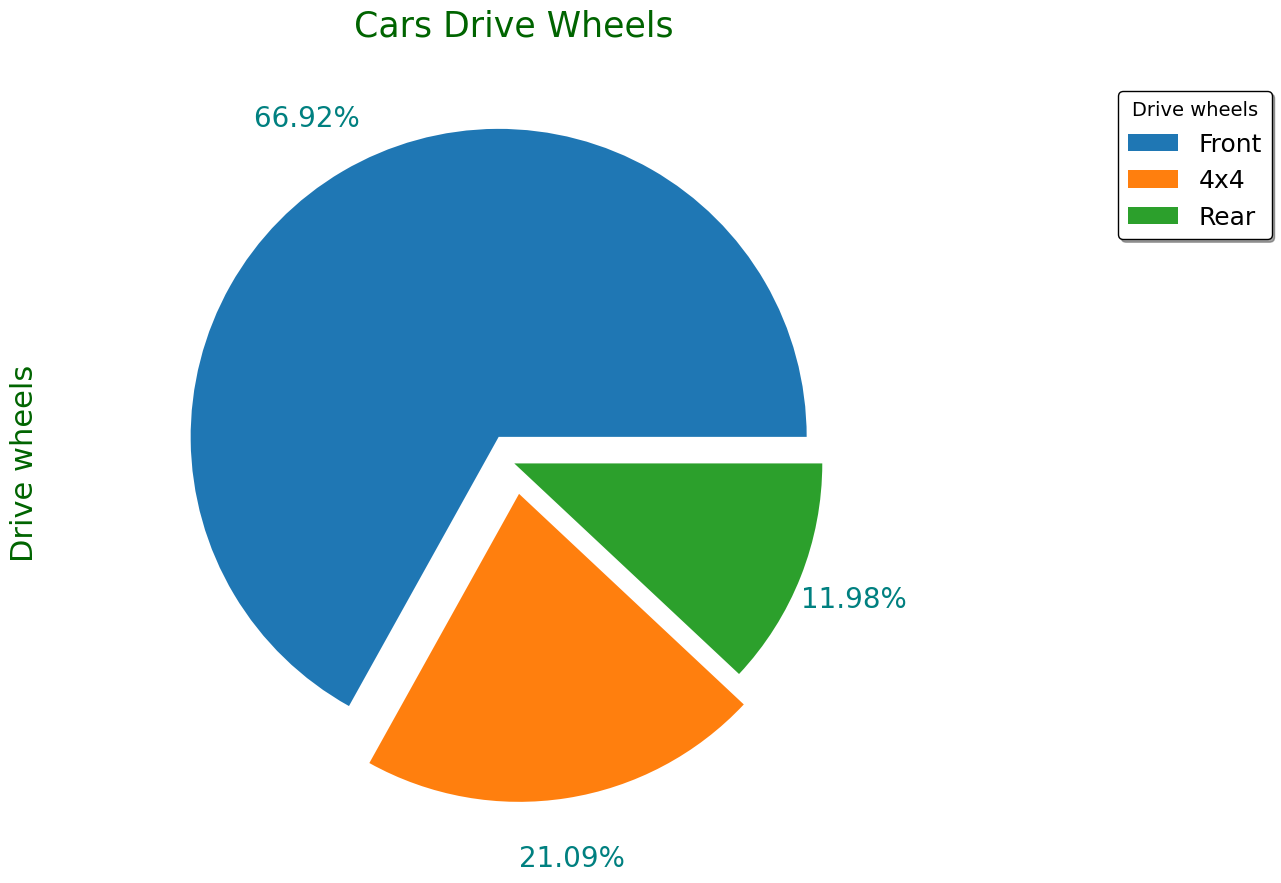

In [9]:
column_name = 'Drive wheels'

explode = (0.1, 0.1) + (0,) * (len(car_df[column_name].value_counts()) - 2)

plot = car_df[column_name].value_counts().plot.pie(
    explode=explode,
    figsize=(15, 10),
    autopct='%1.2f%% ',
    labels=None,
    pctdistance=1.2,
    textprops={'fontsize': 20, 'color': 'teal'}
)

legend_labels = car_df[column_name].value_counts().index
plt.legend(legend_labels, title=column_name, loc="upper right", fontsize='18', 
           shadow=True, bbox_to_anchor=(1.5, 1), edgecolor='black', title_fontsize='14')

plt.title('Cars Drive Wheels', fontsize=25, color='darkgreen', pad=30)
plt.ylabel(column_name, fontsize=22, color='darkgreen', labelpad=65)

plt.show()
